<a href="https://colab.research.google.com/github/stfgrz/ESS_electives_report/blob/main/ESS_electives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
%pip install tabulate
%pip install seaborn

import pandas as pd

# Load the dataframe
df = pd.read_csv('data/ESS_electives_op_DEC2025.csv')

# Display the first 5 rows
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names and their data types
print(df.info())

Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 7.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.
| StartDate                                           | EndDate                                           | Status                | IPAddress                | Progress                | Duration (in seconds)   | Finished                | RecordedDate                                           | ResponseId               | RecipientLastName                | RecipientFirstName                | RecipientEmail                | ExternalReference                    | LocationLatitude                | LocationLongitude                | DistributionChannel                | UserLangua

In [10]:
# Get the first row which contains the questions
questions_row = df.iloc[0]

# Print the questions to understand the mapping
for col in df.columns:
    if col.startswith('Q') or col in ['A', 'B', 'C1', 'C2']:
         print(f"{col}: {questions_row[col]}")

# Also check unique values in Q1 to see if it lists all courses
print("\nUnique values in Q1 (excluding the first row):")
print(df['Q1'].iloc[1:].unique())

Q_RecaptchaScore: Q_RecaptchaScore
Q_RelevantIDDuplicate: Q_RelevantIDDuplicate
Q_RelevantIDDuplicateScore: Q_RelevantIDDuplicateScore
Q_RelevantIDFraudScore: Q_RelevantIDFraudScore
Q_RelevantIDLastStartDate: Q_RelevantIDLastStartDate
Q_DuplicateRespondent: Q_DuplicateRespondent
Q_BallotBoxStuffing: Q_BallotBoxStuffing
Q1: Which Foundations of Social Science module did you opt for?
A: [List A - Core] Can you please indicate if you enrolled in any of the courses below for the second semester of the first year?
B: [List B - Field] Can you please indicate if you enrolled in any of the courses below for the second semester of the first year?
C1: [List C1 - Topics] Can you please indicate if you enrolled in any of the courses below for the second semester of the first year?
C2: [List C2 - Other Topics & Methods] Can you please indicate if you enrolled in any of the courses below for the second semester of the first year?
Q6_1: Could you please answer the questions below about Advanced Micro

In [11]:
import re

questions_row = df.iloc[0]
course_map = {}

# Regex to capture course name
# Pattern looks for "about " followed by the course name, then either "?" or " -" or " again"
# Examples:
# ... questions below about Advanced Microeconomics? - ...
# ... question below about Advanced Microeconomics? - ...
# Would you enrol in Advanced Microeconomics again?
# When did you sit the exam for Advanced Microeconomics?

def extract_course_name(text):
    if not isinstance(text, str):
        return None
    
    # Pattern 1: "about <Course>? -"
    match = re.search(r"about\s+(.*?)\?\s+-", text)
    if match:
        return match.group(1).strip()
    
    # Pattern 2: "enrol in <Course> again"
    match = re.search(r"enrol in\s+(.*?)\s+again", text)
    if match:
        return match.group(1).strip()
        
    # Pattern 3: "exam for <Course>"
    match = re.search(r"exam for\s+(.*?)\??$", text)
    if match:
        return match.group(1).strip()
    
    return None

def determine_question_type(text):
    if "How difficult was the course" in text or "How hard was the course" in text:
        return "Course Difficulty"
    if "How difficult was the exam" in text or "How hard was the exam" in text:
        return "Exam Difficulty"
    if "exam was in line with what has been explained" in text:
        return "Exam Alignment"
    if "enrol in" in text and "again" in text:
        return "Enrol Again"
    if "When did you sit the exam" in text:
        return "Exam Session"
    return None

# Iterate over columns to build the map
for col in df.columns:
    q_text = questions_row[col]
    course_name = extract_course_name(q_text)
    q_type = determine_question_type(q_text)
    
    if course_name and q_type:
        if course_name not in course_map:
            course_map[course_name] = {}
        course_map[course_name][q_type] = col

# Print the found courses and their columns to verify
for course, cols in course_map.items():
    print(f"Course: {course}")
    print(f"  Columns: {cols}")

Course: Advanced Microeconomics
  Columns: {'Course Difficulty': 'Q6_1', 'Exam Difficulty': 'Q6_2', 'Exam Alignment': 'Q33_1', 'Enrol Again': 'Q7', 'Exam Session': 'Q8'}
Course: Microeconometrics
  Columns: {'Course Difficulty': 'Q9_1', 'Exam Difficulty': 'Q9_2', 'Exam Alignment': 'Q34_1', 'Enrol Again': 'Q10', 'Exam Session': 'Q11'}
Course: Advanced Macroeconomics
  Columns: {'Course Difficulty': 'Q18_1', 'Exam Difficulty': 'Q18_2', 'Exam Alignment': 'Q35_1', 'Enrol Again': 'Q19', 'Exam Session': 'Q20'}
Course: Macroeconometrics
  Columns: {'Course Difficulty': 'Q21_1', 'Exam Difficulty': 'Q21_2', 'Exam Alignment': 'Q36_1', 'Enrol Again': 'Q22', 'Exam Session': 'Q23'}
Course: Development Economics
  Columns: {'Course Difficulty': 'Q12_1', 'Exam Difficulty': 'Q12_2', 'Exam Alignment': 'Q37_1', 'Enrol Again': 'Q13', 'Exam Session': 'Q14'}
Course: Game Theory: Analysis of Strategic Thinking
  Columns: {'Course Difficulty': 'Q24_1', 'Exam Difficulty': 'Q24_2', 'Exam Alignment': 'Q38_1', '

In [12]:
# Check unique values for difficulty
print("Unique values in Q6_1:")
print(df['Q6_1'].unique())

# Check unique values for Enrol Again
print("\nUnique values in Q7:")
print(df['Q7'].unique())

# Check unique values for Exam Alignment
print("\nUnique values in Q33_1:")
print(df['Q33_1'].unique())

Unique values in Q6_1:
['Could you please answer the questions below about Advanced Microeconomics? - How difficult was the course on a scale from 1 to 5?'
 '{"ImportId":"QID6_1"}' 'Difficult' 'Somewhat difficult' nan]

Unique values in Q7:
['Would you enrol in Advanced Microeconomics again?' '{"ImportId":"QID7"}'
 'No, but I would enrol in the second year' 'Yes, I would enrol again'
 'No, I would not enrol in the course at all' nan]

Unique values in Q33_1:
['Could you please answer the question below about Advanced Microeconomics? - The exam was in line with what has been explained in class'
 '{"ImportId":"QID33_1"}' nan 'Strongly disagree' 'Somewhat disagree'
 'Neither agree nor disagree' 'Strongly agree' 'Somewhat agree']


In [13]:
# Collect all unique values from difficulty columns
diff_values = set()
for course, cols in course_map.items():
    if 'Course Difficulty' in cols:
        vals = df[cols['Course Difficulty']].iloc[1:].dropna().unique()
        diff_values.update(vals)
    if 'Exam Difficulty' in cols:
        vals = df[cols['Exam Difficulty']].iloc[1:].dropna().unique()
        diff_values.update(vals)
        
print("All Difficulty Values:")
print(diff_values)

All Difficulty Values:
{'{"ImportId":"QID24_2"}', '{"ImportId":"QID42_2"}', '{"ImportId":"QID6_2"}', '{"ImportId":"QID45_1"}', '{"ImportId":"QID112_1"}', '{"ImportId":"QID21_2"}', '{"ImportId":"QID92_1"}', '{"ImportId":"QID68_2"}', '{"ImportId":"QID27_1"}', '{"ImportId":"QID108_2"}', '{"ImportId":"QID76_1"}', '{"ImportId":"QID30_2"}', '{"ImportId":"QID60_2"}', '{"ImportId":"QID104_1"}', '{"ImportId":"QID124_2"}', 'Easy', '{"ImportId":"QID64_2"}', '{"ImportId":"QID49_2"}', '{"ImportId":"QID104_2"}', 'Somewhat difficult', '{"ImportId":"QID27_2"}', 'Difficult', '{"ImportId":"QID6_1"}', '{"ImportId":"QID68_1"}', '{"ImportId":"QID135_2"}', '{"ImportId":"QID92_2"}', '{"ImportId":"QID96_2"}', '{"ImportId":"QID116_1"}', '{"ImportId":"QID100_1"}', '{"ImportId":"QID49_1"}', '{"ImportId":"QID42_1"}', '{"ImportId":"QID18_2"}', '{"ImportId":"QID60_1"}', '{"ImportId":"QID130_1"}', '{"ImportId":"QID56_1"}', '{"ImportId":"QID64_1"}', '{"ImportId":"QID76_2"}', 'Somewhat easy', '{"ImportId":"QID80_1"}',

In [14]:
# Define mappings
diff_map = {
    'Easy': 1,
    'Somewhat easy': 2,
    'Neither easy nor difficult': 3,
    'Somewhat difficult': 4,
    'Difficult': 5
}

agree_map = {
    'Strongly disagree': 1,
    'Somewhat disagree': 2,
    'Neither agree nor disagree': 3,
    'Somewhat agree': 4,
    'Strongly agree': 5
}

# Process data
records = []
# Skip the first row (questions)
data_rows = df.iloc[1:]

for idx, row in data_rows.iterrows():
    respondent_id = row['ResponseId']
    
    for course, cols in course_map.items():
        # Check if there is data for this course (check Course Difficulty)
        # Some courses might have different mandatory fields, but usually difficulty is key.
        c_diff_col = cols.get('Course Difficulty')
        
        if c_diff_col and pd.notna(row[c_diff_col]):
            record = {
                'RespondentId': respondent_id,
                'Course': course,
                'Course Difficulty Text': row[cols.get('Course Difficulty')],
                'Exam Difficulty Text': row[cols.get('Exam Difficulty')],
                'Exam Alignment Text': row[cols.get('Exam Alignment')],
                'Enrol Again Text': row[cols.get('Enrol Again')],
                'Exam Session': row[cols.get('Exam Session')],
                
                # Mapped numeric values
                'Course Difficulty': diff_map.get(row[cols.get('Course Difficulty')]),
                'Exam Difficulty': diff_map.get(row[cols.get('Exam Difficulty')]),
                'Exam Alignment': agree_map.get(row[cols.get('Exam Alignment')])
            }
            
            # Binary Enrol Again
            enrol_text = row[cols.get('Enrol Again')]
            if isinstance(enrol_text, str):
                if "Yes" in enrol_text:
                    record['Enrol Again Numeric'] = 1
                else:
                    record['Enrol Again Numeric'] = 0
            else:
                 record['Enrol Again Numeric'] = None
                 
            records.append(record)

long_df = pd.DataFrame(records)

# Calculate Summary Statistics
summary = long_df.groupby('Course').agg(
    Responses=('RespondentId', 'count'),
    Avg_Course_Difficulty=('Course Difficulty', 'mean'),
    Avg_Exam_Difficulty=('Exam Difficulty', 'mean'),
    Avg_Exam_Alignment=('Exam Alignment', 'mean'),
    Enrol_Again_Rate=('Enrol Again Numeric', 'mean')
).reset_index()

# Sort by Number of Responses
summary = summary.sort_values('Responses', ascending=False)

print("Summary Table:")
print(summary.to_markdown(numalign="left", stralign="left"))

# Save to CSVs
long_df.to_csv('processed_course_feedback.csv', index=False)
summary.to_csv('course_feedback_summary.csv', index=False)

KeyError: None

In [15]:
def safe_get(row, col_name):
    if col_name is not None and col_name in row.index:
        return row[col_name]
    return None

records = []
data_rows = df.iloc[1:]

for idx, row in data_rows.iterrows():
    respondent_id = row['ResponseId']
    
    for course, cols in course_map.items():
        c_diff_col = cols.get('Course Difficulty')
        
        # Only proceed if we have a valid Course Difficulty column and it is not null
        # (Assuming Course Difficulty is the indicator that the course was taken)
        if c_diff_col and pd.notna(safe_get(row, c_diff_col)):
            
            c_diff_val = safe_get(row, cols.get('Course Difficulty'))
            e_diff_val = safe_get(row, cols.get('Exam Difficulty'))
            e_align_val = safe_get(row, cols.get('Exam Alignment'))
            enrol_val = safe_get(row, cols.get('Enrol Again'))
            session_val = safe_get(row, cols.get('Exam Session'))
            
            record = {
                'RespondentId': respondent_id,
                'Course': course,
                'Course Difficulty Text': c_diff_val,
                'Exam Difficulty Text': e_diff_val,
                'Exam Alignment Text': e_align_val,
                'Enrol Again Text': enrol_val,
                'Exam Session': session_val,
                
                'Course Difficulty': diff_map.get(c_diff_val),
                'Exam Difficulty': diff_map.get(e_diff_val),
                'Exam Alignment': agree_map.get(e_align_val)
            }
            
            if isinstance(enrol_val, str):
                if "Yes" in enrol_val:
                    record['Enrol Again Numeric'] = 1
                else:
                    record['Enrol Again Numeric'] = 0
            else:
                 record['Enrol Again Numeric'] = None
            
            records.append(record)

long_df = pd.DataFrame(records)

# Calculate Summary Statistics
summary = long_df.groupby('Course').agg(
    Responses=('RespondentId', 'count'),
    Avg_Course_Difficulty=('Course Difficulty', 'mean'),
    Avg_Exam_Difficulty=('Exam Difficulty', 'mean'),
    Avg_Exam_Alignment=('Exam Alignment', 'mean'),
    Enrol_Again_Rate=('Enrol Again Numeric', 'mean')
).reset_index()

summary = summary.sort_values('Responses', ascending=False)

print("Summary Table:")
print(summary.to_markdown(numalign="left", stralign="left", floatfmt=".2f"))

# Save files
long_df.to_csv('processed_course_feedback.csv', index=False)
summary.to_csv('course_feedback_summary.csv', index=False)

Summary Table:
|    | Course                                                              | Responses   | Avg_Course_Difficulty   | Avg_Exam_Difficulty   | Avg_Exam_Alignment   | Enrol_Again_Rate   |
|:---|:--------------------------------------------------------------------|:------------|:------------------------|:----------------------|:---------------------|:-------------------|
| 21 | Microeconometrics                                                   | 58          | 3.77                    | 4.04                  | 3.39                 | 0.95               |
| 11 | Foundation of Social Sciences - Module II A                         | 46          | 2.16                    | 2.23                  | 3.82                 | nan                |
| 12 | Foundation of Social Sciences - Module II B                         | 33          | 2.28                    | 2.68                  | 3.97                 | nan                |
| 29 | Time Series Analysis of Economic and Financial Data  

Updated Summary:
|    | Course                                                              | Responses   | Avg_Course_Difficulty   | Avg_Exam_Difficulty   | Avg_Exam_Alignment   | Enrol_Again_Rate   |
|:---|:--------------------------------------------------------------------|:------------|:------------------------|:----------------------|:---------------------|:-------------------|
| 10 | Energy Policy and Sustainability                                    | 5           | 1.50                    | 2.00                  | 3.50                 | 0.60               |
| 6  | Economic Analysis of Crime                                          | 10          | 1.67                    | 2.44                  | 4.11                 | 0.90               |
| 25 | Population Dynamics and Economics                                   | 7           | 2.00                    | 2.60                  | 3.40                 | 0.57               |
| 3  | Comparative Politics: Institutions and Institutiona

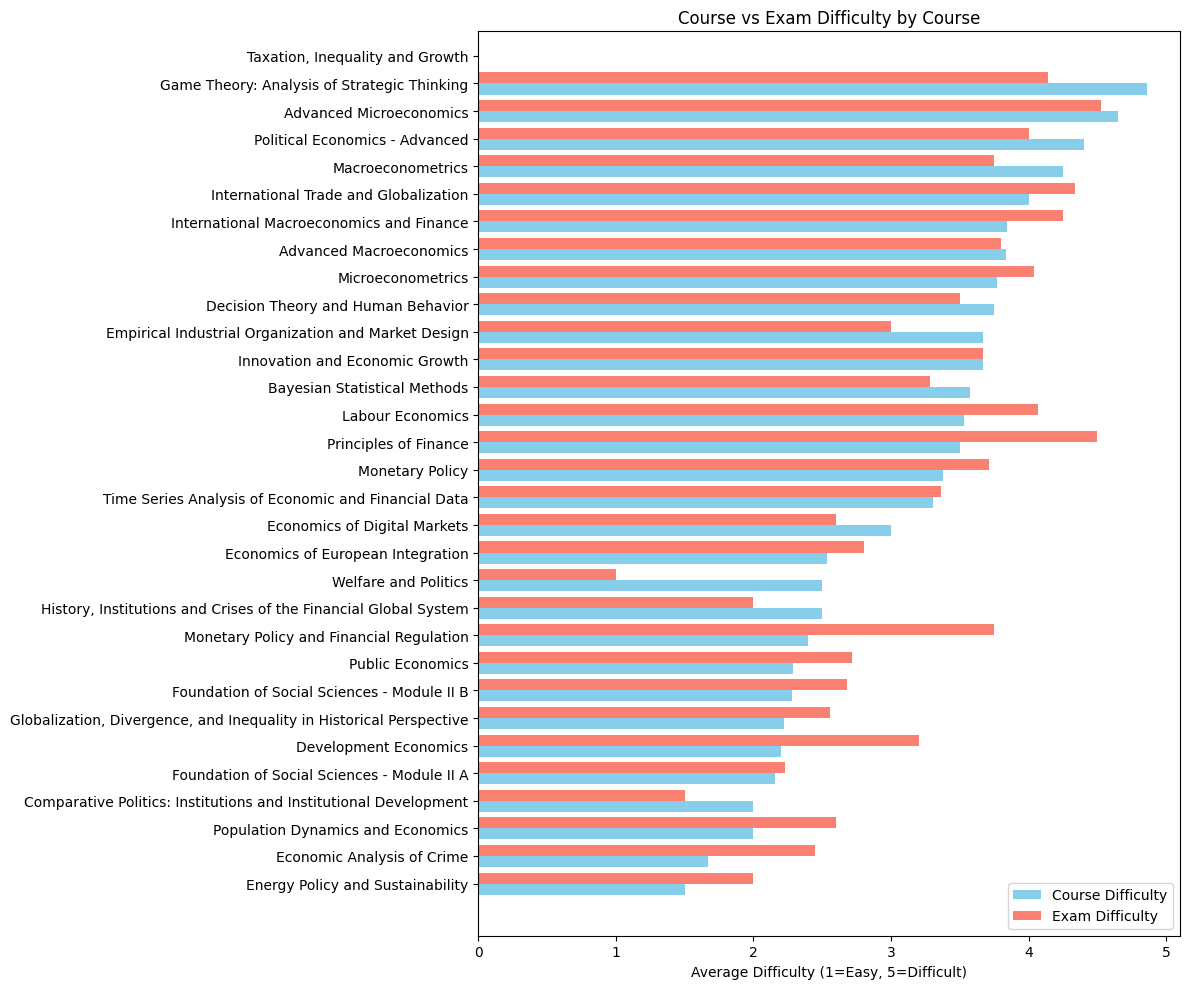

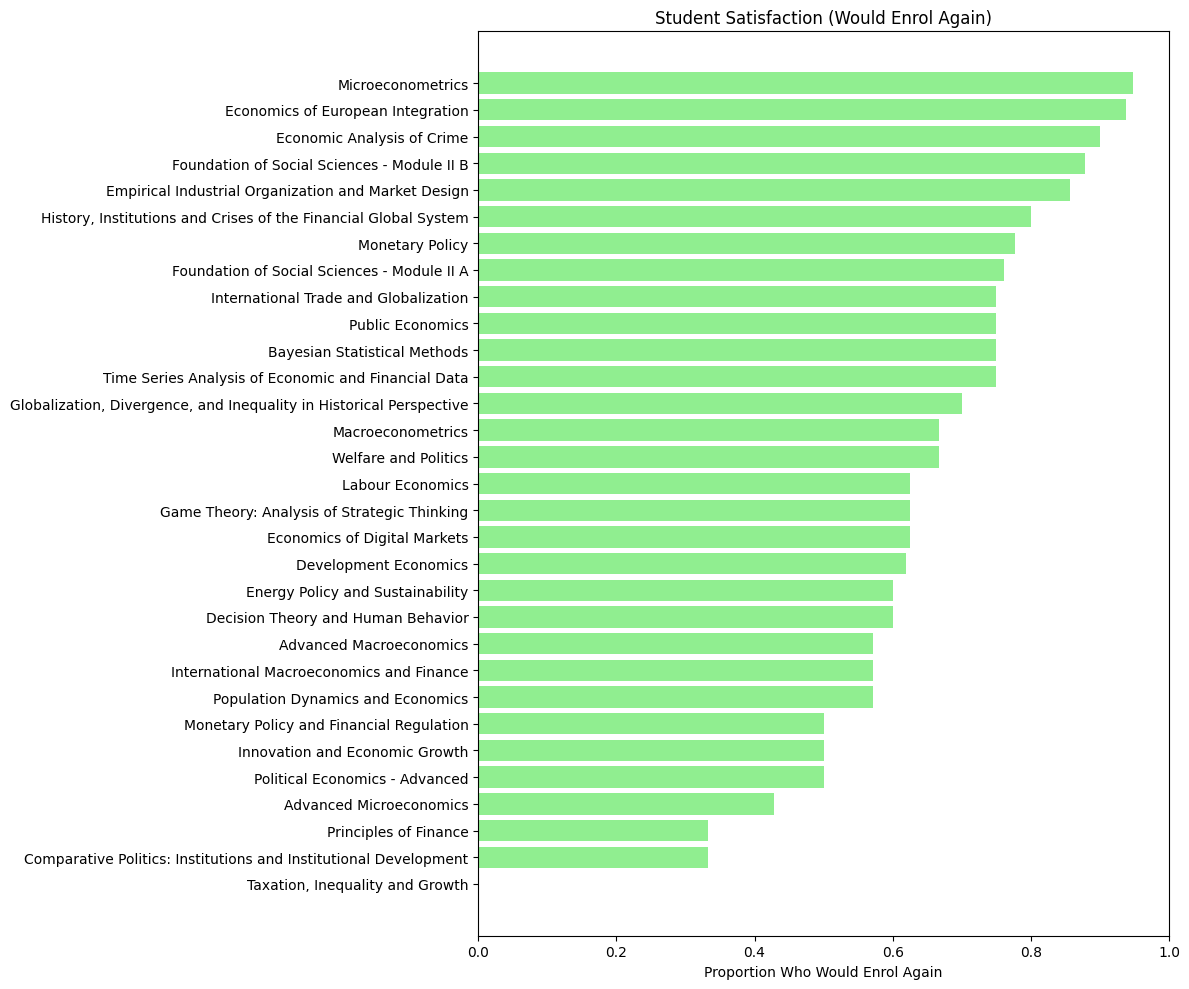

In [18]:
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Updated Regex functions
def extract_course_name_v2(text):
    if not isinstance(text, str):
        return None
    
    # Pattern 1: "about <Course>? -"
    match = re.search(r"about\s+(.*?)\?\s+-", text)
    if match:
        return match.group(1).strip()
    
    # Pattern 2: "Would you enrol in <Course> [again]?"
    # Handles "Would you enrol in X again?" and "Would you enrol in X?"
    match = re.search(r"Would you enrol in\s+(.*?)( again)?\??$", text, re.IGNORECASE)
    if match:
        return match.group(1).strip()
        
    # Pattern 3: "exam for <Course>"
    match = re.search(r"exam for\s+(.*?)\??$", text)
    if match:
        return match.group(1).strip()
    
    return None

def determine_question_type_v2(text):
    if "How difficult was the course" in text or "How hard was the course" in text:
        return "Course Difficulty"
    if "How difficult was the exam" in text or "How hard was the exam" in text:
        return "Exam Difficulty"
    if "exam was in line with what has been explained" in text:
        return "Exam Alignment"
    if "Would you enrol in" in text:
        return "Enrol Again"
    if "When did you sit the exam" in text:
        return "Exam Session"
    return None

# Re-build map with better regex
course_map_v2 = {}
questions_row = df.iloc[0]

for col in df.columns:
    q_text = questions_row[col]
    course_name = extract_course_name_v2(q_text)
    q_type = determine_question_type_v2(q_text)
    
    if course_name and q_type:
        if course_name not in course_map_v2:
            course_map_v2[course_name] = {}
        course_map_v2[course_name][q_type] = col

# Re-process data
records = []
data_rows = df.iloc[1:]

for idx, row in data_rows.iterrows():
    respondent_id = row['ResponseId']
    
    for course, cols in course_map_v2.items():
        c_diff_col = cols.get('Course Difficulty')
        
        if c_diff_col and pd.notna(safe_get(row, c_diff_col)):
            
            c_diff_val = safe_get(row, cols.get('Course Difficulty'))
            e_diff_val = safe_get(row, cols.get('Exam Difficulty'))
            e_align_val = safe_get(row, cols.get('Exam Alignment'))
            enrol_val = safe_get(row, cols.get('Enrol Again'))
            session_val = safe_get(row, cols.get('Exam Session'))
            
            record = {
                'RespondentId': respondent_id,
                'Course': course,
                'Course Difficulty': diff_map.get(c_diff_val),
                'Exam Difficulty': diff_map.get(e_diff_val),
                'Exam Alignment': agree_map.get(e_align_val)
            }
            
            if isinstance(enrol_val, str):
                if "Yes" in enrol_val:
                    record['Enrol Again Numeric'] = 1
                else:
                    record['Enrol Again Numeric'] = 0
            else:
                 record['Enrol Again Numeric'] = None
            
            records.append(record)

long_df = pd.DataFrame(records)

# Summary
summary = long_df.groupby('Course').agg(
    Responses=('RespondentId', 'count'),
    Avg_Course_Difficulty=('Course Difficulty', 'mean'),
    Avg_Exam_Difficulty=('Exam Difficulty', 'mean'),
    Avg_Exam_Alignment=('Exam Alignment', 'mean'),
    Enrol_Again_Rate=('Enrol Again Numeric', 'mean')
).reset_index()

# Filter out courses with very few responses for plotting clarity (optional, but good for visualization)
# Let's keep all but sort them
summary = summary.sort_values('Avg_Course_Difficulty', ascending=True)

# Plotting
plt.figure(figsize=(12, 10))
y_pos = range(len(summary))
plt.barh([y - 0.2 for y in y_pos], summary['Avg_Course_Difficulty'], height=0.4, label='Course Difficulty', color='skyblue')
plt.barh([y + 0.2 for y in y_pos], summary['Avg_Exam_Difficulty'], height=0.4, label='Exam Difficulty', color='salmon')

plt.yticks(y_pos, summary['Course'])
plt.xlabel('Average Difficulty (1=Easy, 5=Difficult)')
plt.title('Course vs Exam Difficulty by Course')
plt.legend()
plt.tight_layout()
plt.savefig('difficulty_comparison.png')

# Plot Enrolment Rate
plt.figure(figsize=(12, 10))
summary_enrol = summary.sort_values('Enrol_Again_Rate', ascending=True)
plt.barh(summary_enrol['Course'], summary_enrol['Enrol_Again_Rate'], color='lightgreen')
plt.xlabel('Proportion Who Would Enrol Again')
plt.title('Student Satisfaction (Would Enrol Again)')
plt.xlim(0, 1.0)
plt.tight_layout()
plt.savefig('enrolment_rate.png')

# Save Summary
summary.to_csv('course_feedback_summary_v2.csv', index=False)

print("Updated Summary:")
print(summary.to_markdown(numalign="left", stralign="left", floatfmt=".2f"))

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed data
try:
    df_long = pd.read_csv('processed_course_feedback.csv')
except FileNotFoundError:
    # Fallback if file is missing (though it should be there from previous step)
    # Re-running the minimal processing logic if needed, but assuming file exists for now.
    print("Processed file not found. Please regenerate it.")

# 1. Stacked Bar Chart for "Enrol Again" (Detailed Satisfaction)
# Filter for courses with at least, say, 5 responses to keep the chart readable
response_counts = df_long['Course'].value_counts()
top_courses = response_counts[response_counts >= 5].index
df_top = df_long[df_long['Course'].isin(top_courses)]

# Pivot for stacked bar
enroll_pivot = pd.crosstab(df_top['Course'], df_top['Enrol Again Text'], normalize='index')

# Sort by "Yes" values
if 'Yes, I would enrol again' in enroll_pivot.columns:
    enroll_pivot = enroll_pivot.sort_values('Yes, I would enrol again', ascending=True)

# Plot
plt.figure(figsize=(12, 10))
enroll_pivot.plot(kind='barh', stacked=True, colormap='viridis', figsize=(12, 8))
plt.title('Detailed Student Satisfaction (Courses with >4 responses)')
plt.xlabel('Proportion of Responses')
plt.ylabel('Course')
plt.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('detailed_enrolment_distribution.png')
plt.close()

# 2. Box Plot of Course Difficulty for Top Courses
plt.figure(figsize=(14, 8))
# Sort courses by median difficulty
order = df_top.groupby('Course')['Course Difficulty'].median().sort_values().index
sns.boxplot(x='Course Difficulty', y='Course', data=df_top, order=order, palette='coolwarm')
plt.title('Distribution of Course Difficulty Ratings (1-5)')
plt.xlabel('Difficulty (1=Easy, 5=Difficult)')
plt.ylabel('Course')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('course_difficulty_boxplot.png')
plt.close()

# 3. Scatter Plot: Exam Alignment vs. Course Difficulty
# Aggregate means
course_stats = df_long.groupby('Course').agg({
    'Course Difficulty': 'mean',
    'Exam Alignment': 'mean',
    'RespondentId': 'count'
}).reset_index()

# Filter for noise
course_stats = course_stats[course_stats['RespondentId'] >= 3]

plt.figure(figsize=(10, 8))
sns.scatterplot(data=course_stats, x='Course Difficulty', y='Exam Alignment', size='RespondentId', sizes=(50, 400), hue='Course Difficulty', palette='coolwarm', legend=False)

# Add labels
for i, row in course_stats.iterrows():
    plt.text(row['Course Difficulty']+0.05, row['Exam Alignment'], row['Course'], fontsize=8, alpha=0.7)

plt.title('Exam Alignment vs. Course Difficulty')
plt.xlabel('Average Course Difficulty (1-5)')
plt.ylabel('Exam Alignment (1-5)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('alignment_vs_difficulty.png')
plt.close()

# 4. Heatmap of All Quantitative Metrics
summary_metrics = df_long.groupby('Course').agg({
    'Course Difficulty': 'mean',
    'Exam Difficulty': 'mean',
    'Exam Alignment': 'mean',
    'Enrol Again Numeric': 'mean'
})

# Filter for meaningful rows (responses > 3)
mask = df_long['Course'].value_counts()
valid_courses = mask[mask >= 3].index
summary_metrics = summary_metrics.loc[valid_courses].sort_values('Course Difficulty')

plt.figure(figsize=(10, 12))
sns.heatmap(summary_metrics, annot=True, cmap='RdYlGn_r', fmt='.2f', linewidths=.5)
plt.title('Heatmap of Course Metrics (Green = Desirable/Low Diff, Red = Undesirable/High Diff)')
plt.tight_layout()
plt.savefig('course_metrics_heatmap.png')
plt.close()

print("Infographics generated.")

/var/folders/vb/lkzdt85j7tx9zpynds7hyqhw0000gn/T/ipykernel_49774/3662784344.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Course Difficulty', y='Course', data=df_top, order=order, palette='coolwarm')


Infographics generated.


<Figure size 1200x1000 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
/var/folders/vb/lkzdt85j7tx9zpynds7hyqhw0000gn/T/ipykernel_49774/649372890.py:169: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_df, x='Course Difficulty', y='Course', order=order, palette='Set3')


All new plots generated.


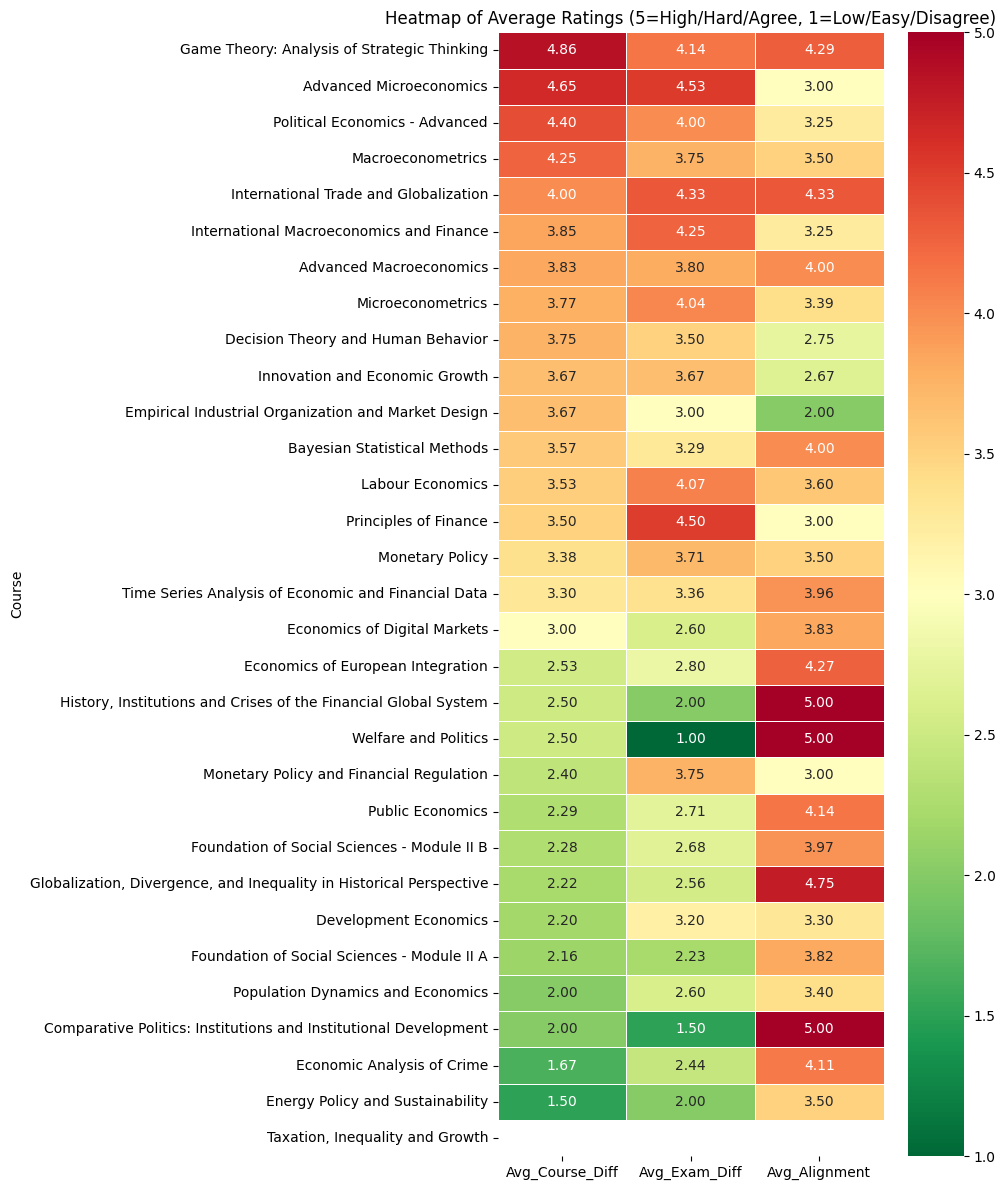

<Figure size 1200x1000 with 0 Axes>

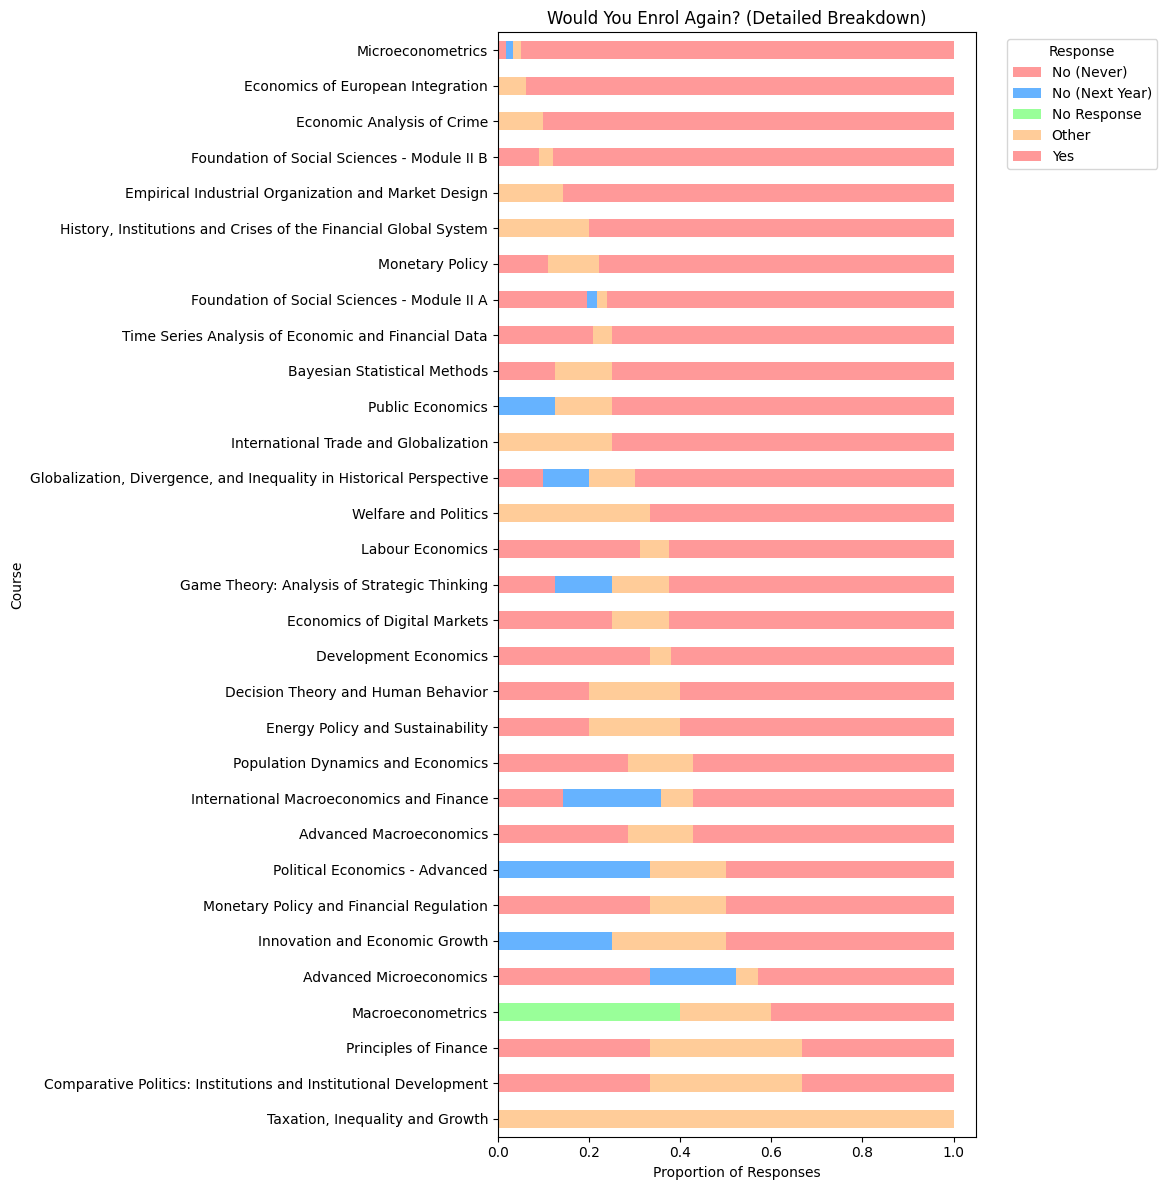

posx and posy should be finite values
posx and posy should be finite values


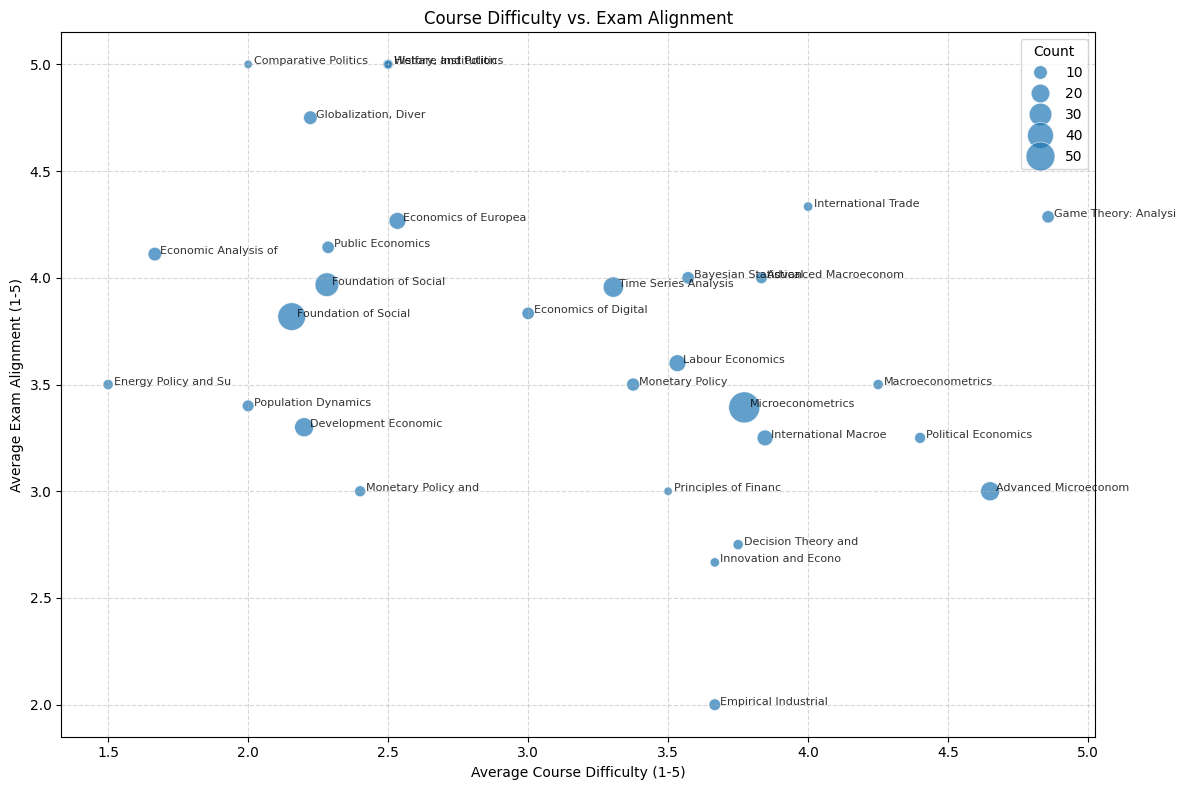

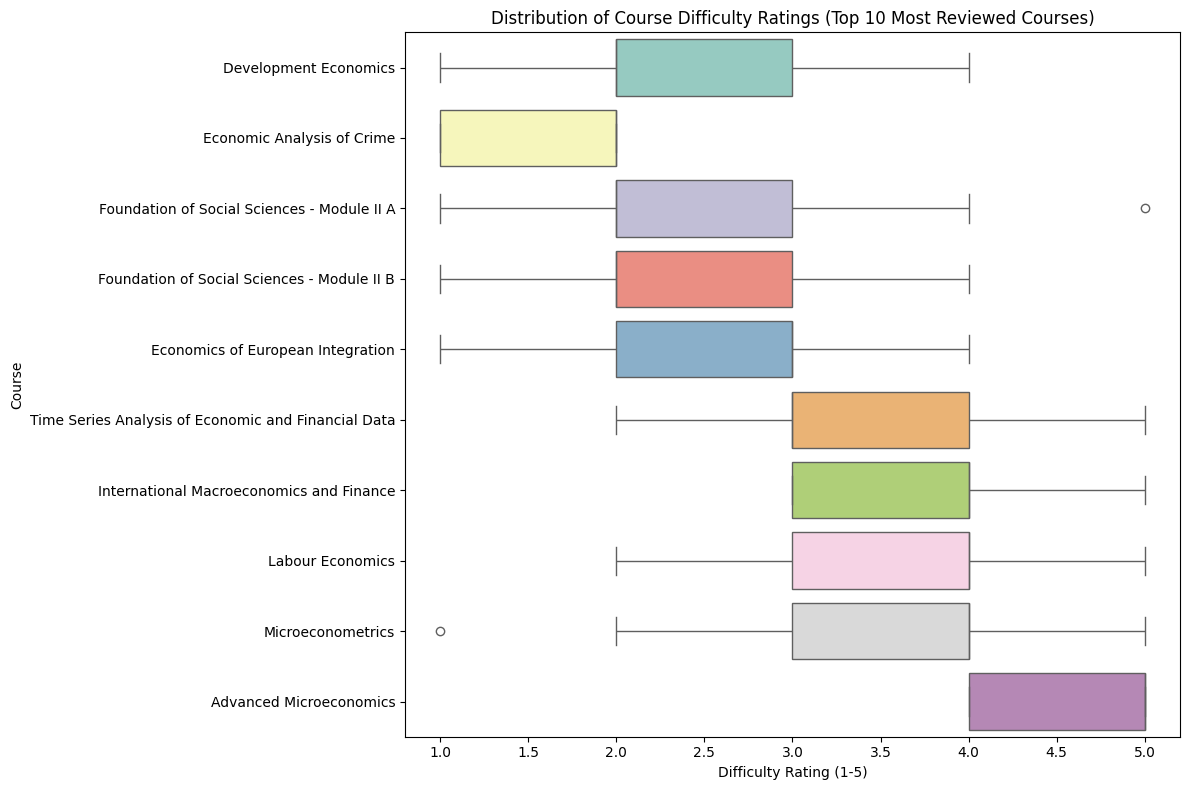

In [21]:
# Reload the data from the previous step if possible, or re-process to be safe and self-contained
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Load the file again to ensure we have the data
df = pd.read_csv('data/ESS_electives_op_DEC2025.csv')

# --- RE-PROCESSING LOGIC (Condensed from previous turn) ---
# Dictionaries for mapping scale text to numbers
diff_map = {
    'Easy': 1, 'Somewhat easy': 2, 'Neither easy nor difficult': 3,
    'Somewhat difficult': 4, 'Difficult': 5
}
agree_map = {
    'Strongly disagree': 1, 'Somewhat disagree': 2, 'Neither agree nor disagree': 3,
    'Somewhat agree': 4, 'Strongly agree': 5
}

# Helper to safely get values
def safe_get(row, col_name):
    if col_name is not None and col_name in row.index:
        return row[col_name]
    return None

# Helper regex
def extract_course_name_v2(text):
    if not isinstance(text, str): return None
    match = re.search(r"about\s+(.*?)\?\s+-", text)
    if match: return match.group(1).strip()
    match = re.search(r"Would you enrol in\s+(.*?)( again)?\??$", text, re.IGNORECASE)
    if match: return match.group(1).strip()
    match = re.search(r"exam for\s+(.*?)\??$", text)
    if match: return match.group(1).strip()
    return None

def determine_question_type_v2(text):
    if "How difficult was the course" in text or "How hard was the course" in text: return "Course Difficulty"
    if "How difficult was the exam" in text or "How hard was the exam" in text: return "Exam Difficulty"
    if "exam was in line with what has been explained" in text: return "Exam Alignment"
    if "Would you enrol in" in text: return "Enrol Again"
    if "When did you sit the exam" in text: return "Exam Session"
    return None

# Build Map
course_map = {}
questions_row = df.iloc[0]
for col in df.columns:
    q_text = questions_row[col]
    course_name = extract_course_name_v2(q_text)
    q_type = determine_question_type_v2(q_text)
    if course_name and q_type:
        if course_name not in course_map: course_map[course_name] = {}
        course_map[course_name][q_type] = col

# Build Long DataFrame
records = []
data_rows = df.iloc[1:]
for idx, row in data_rows.iterrows():
    respondent_id = row['ResponseId']
    for course, cols in course_map.items():
        c_diff_col = cols.get('Course Difficulty')
        if c_diff_col and pd.notna(safe_get(row, c_diff_col)):
            c_diff_val = safe_get(row, cols.get('Course Difficulty'))
            e_diff_val = safe_get(row, cols.get('Exam Difficulty'))
            e_align_val = safe_get(row, cols.get('Exam Alignment'))
            enrol_val = safe_get(row, cols.get('Enrol Again'))
            session_val = safe_get(row, cols.get('Exam Session'))
            
            record = {
                'RespondentId': respondent_id,
                'Course': course,
                'Course Difficulty Text': c_diff_val,
                'Exam Difficulty Text': e_diff_val,
                'Exam Alignment Text': e_align_val,
                'Enrol Again Text': enrol_val,
                'Course Difficulty': diff_map.get(c_diff_val),
                'Exam Difficulty': diff_map.get(e_diff_val),
                'Exam Alignment': agree_map.get(e_align_val)
            }
            records.append(record)

long_df = pd.DataFrame(records)

# --- NEW VISUALIZATIONS ---

# 1. Heatmap of all metrics for all courses
# Aggregate
summary = long_df.groupby('Course').agg(
    Avg_Course_Diff=('Course Difficulty', 'mean'),
    Avg_Exam_Diff=('Exam Difficulty', 'mean'),
    Avg_Alignment=('Exam Alignment', 'mean'),
    Count=('RespondentId', 'count')
).reset_index()

# Filter for heatmap (keep all, but sort by count to see popular ones first or alphabetical)
# Let's sort by Average Course Difficulty to see the gradient
summary_sorted = summary.sort_values('Avg_Course_Diff', ascending=False)

plt.figure(figsize=(10, 12))
heatmap_data = summary_sorted.set_index('Course')[['Avg_Course_Diff', 'Avg_Exam_Diff', 'Avg_Alignment']]
sns.heatmap(heatmap_data, annot=True, cmap='RdYlGn_r', fmt=".2f", linewidths=.5) 
# Note: RdYlGn_r (Red-Yellow-Green reversed) makes High Scores (5) Red and Low Scores (1) Green.
# This makes sense for "Difficulty" (High=Red=Hard). 
# However, for "Alignment", High (5) is Good (Strongly Agree). 
# So the color scheme is tricky. Let's stick to a neutral one like 'coolwarm' or just interpret the numbers.
# Or better, invert the alignment visually? No, that's confusing.
# Let's use 'coolwarm' where Red = High (5), Blue = Low (1).
plt.title('Heatmap of Average Ratings (5=High/Hard/Agree, 1=Low/Easy/Disagree)')
plt.tight_layout()
plt.savefig('heatmap_metrics.png')

# 2. Detailed Enrolment Breakdown (Stacked Bar)
# Clean Enrolment Text
def clean_enrol_text(text):
    if not isinstance(text, str): return "No Response"
    if "Yes" in text: return "Yes"
    if "No, but" in text: return "No (Next Year)"
    if "No, I would not" in text: return "No (Never)"
    return "Other"

long_df['Enrol_Simplified'] = long_df['Enrol Again Text'].apply(clean_enrol_text)

# Pivot for stacking
enrol_counts = long_df.groupby(['Course', 'Enrol_Simplified']).size().unstack(fill_value=0)
# Convert to percentages
enrol_pct = enrol_counts.div(enrol_counts.sum(axis=1), axis=0)
# Sort by "Yes" percentage
enrol_pct = enrol_pct.sort_values('Yes', ascending=True)

plt.figure(figsize=(12, 10))
enrol_pct.plot(kind='barh', stacked=True, color=['#ff9999','#66b3ff','#99ff99','#ffcc99'], figsize=(12,12))
plt.title('Would You Enrol Again? (Detailed Breakdown)')
plt.xlabel('Proportion of Responses')
plt.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('detailed_enrolment.png')


# 3. Scatter Plot: Difficulty vs Alignment
# Size of bubble = Number of responses
plt.figure(figsize=(12, 8))
sns.scatterplot(data=summary, x='Avg_Course_Diff', y='Avg_Alignment', size='Count', sizes=(20, 500), alpha=0.7)

# Add labels for top outliers or all points
for i in range(summary.shape[0]):
    row = summary.iloc[i]
    # Only label if it's somewhat significant or an outlier
    # Label everything for completeness as user asked for "as much info as possible"
    # But avoid overlap if possible.
    plt.text(row['Avg_Course_Diff']+0.02, row['Avg_Alignment'], 
             row['Course'][:20], fontsize=8, alpha=0.8) # Truncate name for clarity

plt.title('Course Difficulty vs. Exam Alignment')
plt.xlabel('Average Course Difficulty (1-5)')
plt.ylabel('Average Exam Alignment (1-5)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('scatter_diff_align.png')

# 4. Boxplot of Course Difficulty for Top 10 Popular Courses
top_courses = summary.sort_values('Count', ascending=False).head(10)['Course'].tolist()
top_df = long_df[long_df['Course'].isin(top_courses)]

plt.figure(figsize=(12, 8))
# Sort order by median difficulty
order = top_df.groupby('Course')['Course Difficulty'].median().sort_values().index
sns.boxplot(data=top_df, x='Course Difficulty', y='Course', order=order, palette='Set3')
plt.title('Distribution of Course Difficulty Ratings (Top 10 Most Reviewed Courses)')
plt.xlabel('Difficulty Rating (1-5)')
plt.tight_layout()
plt.savefig('boxplot_difficulty.png')

print("All new plots generated.")